In [78]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [79]:
df = pd.read_csv("exoplanet_data.csv")
df = df.dropna(axis='columns', how='all')
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [80]:
df2 = df.drop(df[df.koi_disposition == "CANDIDATE"].index)


# Create X adn y

In [81]:
X = df2.drop("koi_disposition", 1)
y = df2["koi_disposition"]

# Create a Train Test Split


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [83]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
979,0,1,1,1,41.077297,1.985000e-04,-1.985000e-04,379.128480,0.003110,-0.003110,...,-189,4.381,0.195,-0.214,0.938,0.263,-0.197,289.07703,51.761822,14.907
6201,0,1,0,0,13.639480,1.970000e-06,-1.970000e-06,144.531439,0.000123,-0.000123,...,-164,4.517,0.060,-0.140,0.846,0.184,-0.085,292.21732,49.707901,15.852
5648,0,1,0,0,14.854416,7.890000e-07,-7.890000e-07,136.559783,0.000044,-0.000044,...,-197,4.444,0.070,-0.224,1.022,0.350,-0.117,282.42578,43.884331,14.558
229,0,0,0,0,10.681695,5.170000e-05,-5.170000e-05,131.550820,0.003720,-0.003720,...,0,4.221,0.188,-0.101,1.250,0.196,-0.240,292.58044,46.097389,15.065
1302,0,0,0,0,12.509458,7.470000e-05,-7.470000e-05,136.992170,0.004600,-0.004600,...,-119,4.303,0.120,-0.108,1.184,0.183,-0.165,295.42200,38.735691,13.860


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [84]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)


X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)


# Train the Model and use REFCV to use optimal features




In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV


rf = RandomForestClassifier(n_estimators=200)

selector = RFECV(rf, step=1)
selector = selector.fit(X_train_minmax, y_train)


print(f"Training Data Score: {selector.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {selector.score(X_test_minmax, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.973604826546003


In [87]:
selector.ranking_

array([ 1,  1,  1,  2,  1,  9, 10, 16,  6,  1,  7, 20, 24, 15,  1,  1,  8,
       12, 13,  1,  1,  1,  1,  5,  1, 11,  3, 27, 23,  1,  1, 19, 25, 14,
       17,  4, 21, 18, 26, 22])

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [107]:
# Create the GridSearchCV model

from sklearn.model_selection import GridSearchCV
param_grid = {'estimator__criterion': ["gini", "entropy"],
             "estimator__ccp_alpha" : [0, 0.005],
             }

grid = GridSearchCV(selector, param_grid, verbose=3)

In [108]:
# Train the model with GridSearch
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] estimator__ccp_alpha=0, estimator__criterion=gini ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  estimator__ccp_alpha=0, estimator__criterion=gini, score=0.986, total= 3.9min
[CV] estimator__ccp_alpha=0, estimator__criterion=gini ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[CV]  estimator__ccp_alpha=0, estimator__criterion=gini, score=0.991, total= 3.8min
[CV] estimator__ccp_alpha=0, estimator__criterion=gini ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.6min remaining:    0.0s


[CV]  estimator__ccp_alpha=0, estimator__criterion=gini, score=0.987, total= 3.8min
[CV] estimator__ccp_alpha=0, estimator__criterion=gini ...............
[CV]  estimator__ccp_alpha=0, estimator__criterion=gini, score=0.991, total= 3.8min
[CV] estimator__ccp_alpha=0, estimator__criterion=gini ...............
[CV]  estimator__ccp_alpha=0, estimator__criterion=gini, score=0.986, total= 3.7min
[CV] estimator__ccp_alpha=0, estimator__criterion=entropy ............
[CV]  estimator__ccp_alpha=0, estimator__criterion=entropy, score=0.989, total= 4.5min
[CV] estimator__ccp_alpha=0, estimator__criterion=entropy ............
[CV]  estimator__ccp_alpha=0, estimator__criterion=entropy, score=0.992, total= 4.4min
[CV] estimator__ccp_alpha=0, estimator__criterion=entropy ............
[CV]  estimator__ccp_alpha=0, estimator__criterion=entropy, score=0.990, total= 4.4min
[CV] estimator__ccp_alpha=0, estimator__criterion=entropy ............
[CV]  estimator__ccp_alpha=0, estimator__criterion=entropy, s

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 88.2min finished


GridSearchCV(estimator=RFECV(estimator=RandomForestClassifier(n_estimators=200)),
             param_grid={'estimator__ccp_alpha': [0, 0.005],
                         'estimator__criterion': ['gini', 'entropy']},
             verbose=3)

In [109]:
print(grid.best_params_)
print(grid.best_score_)

{'estimator__ccp_alpha': 0, 'estimator__criterion': 'entropy'}
0.9906990929490218


In [121]:
grid.score(X_test_minmax, y_test)

0.9849170437405732

In [122]:
predictions = grid.predict(X_test_minmax)

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CONFIRMED       1.00      0.96      0.98       451
FALSE POSITIVE       0.98      1.00      0.99       875

      accuracy                           0.98      1326
     macro avg       0.99      0.98      0.98      1326
  weighted avg       0.99      0.98      0.98      1326



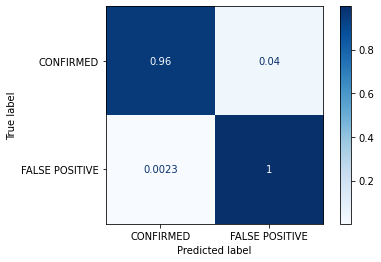

In [127]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(grid, X_test_minmax, y_test, cmap=plt.cm.Blues, normalize="true")

# Save the Model

In [115]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Random_Forest_Model.sav'
joblib.dump(selector, filename)

['Random_Forest_Model.sav']